# Проект по теме "Сбор и хранение данных"

# Аналитика в авиакомпании

## Описание проекта
Компания «F9» — это российская авиакомпания, выполняющая внутренние пассажирские авиаперевозки. Сотни перелётов каждый день. Важно понять предпочтения пользователей, покупающих билеты на те или иные направления.
Необходимо изучить базу данных и проанализировать спрос пассажиров на рейсы в города, где проходят крупнейшие фестивали.

## Описание данных

Таблица *airports* — информация об аэропортах:
- *airport_code* — трёхбуквенный код аэропорта
- *airport_name* — название аэропорта
- *city* — город
- *timezone* — временная зона

Таблица aircrafts — информация о самолётах:
- aircraft_code — код модели самолёта
- model — модель самолёта
- range — количество самолётов

Таблица tickets — информация о билетах:
- ticket_no — уникальный номер билета
- passenger_id — персональный идентификатор пассажира
- passenger_name — имя и фамилия пассажира

Таблица flights — информация о рейсах:
- flight_id — уникальный идентификатор рейса
- departure_airport — аэропорт вылета
- departure_time — дата и время вылета
- arrival_airport — аэропорт прилёта
- arrival_time — дата и время прилёта
- aircraft_code – id самолёта

Таблица ticket_flights — стыковая таблица «рейсы-билеты»
- ticket_no — номер билета
- flight_id — идентификатор рейса

Таблица festivals — информация о фестивалях
- festival_id — уникальный номер фестиваля
- festival_date — дата проведения фестиваля
- festival_city — город проведения фестиваля
- festival_name — название фестиваля



## Основные шаги

    1. Написать парсер для сбора с сайта данных о 10 крупнейших фестивалях 2018 года. (Тренажёр)
    2. Провести исследовательский анализ данных. (Тренажёр)
    3. Проверить гипотезу, что количество рейсов во время фестивалей увеличивается. (Тренажёр)
    4. Аналитика средствами Python.
    5. Проверка гипотезы средствами Python.

## Аналитика средствами Python

Есть файлы, в которых содержатся результаты запросов из предыдущих заданий.

/datasets/query_1.csv - информация о:
- model — модели самолета
- flights_amount — количество рейсов для каждой модели самолетов model в сентябре 2018 года

/datasets/query_3.csv - информация о:
- city — городах
- average_flights — среднем количестве рейсов, прибывающих в город city за день в сентябре 2018 года

Для этих двух наборов данных нужно:
- импортировать файлы;
- изучить данные в них;
- проверить типы данных на корректность;
- выбрать топ-10 городов по количеству рейсов;
- построить графики: модели самолетов и количество рейсов, города и количество рейсов, топ-10 городов и количество рейсов;
- сделать выводы по каждому из графиков, пояснить результат.

In [72]:
#Импорт библиотек
import pandas as pd
import math
from math import ceil
import matplotlib.pyplot as plt
import numpy as np
from math import factorial
from scipy import stats as st

In [73]:
#Импорт файла с данными
df_plane=pd.read_csv('/datasets/query_1.csv')
df_city=pd.read_csv('/datasets/query_3.csv')

In [74]:
#Обзор данных 1
df_plane

,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300
5,Bombardier CRJ-200,4446
6,Cessna 208 Caravan,4557
7,Sukhoi SuperJet-100,4185


In [75]:
df_plane.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
model             8 non-null object
flights_amount    8 non-null int64
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


В первой таблице всего 8 наблюдений. Пропусков нет. Данные корректные. Одна переменная - объект, одна - целочисленная. Типы данных корректны.

In [76]:
#Обзор данных 2
df_city

,city,average_flights
0,Абакан,3.870968
1,Анадырь,1.000000
2,Анапа,2.161290
3,Архангельск,5.354839
4,Астрахань,2.451613
...,...,...
96,Чита,1.580645
97,Элиста,4.870968
98,Южно-Сахалинск,4.290323
99,Якутск,2.741935


In [77]:
df_city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
city               101 non-null object
average_flights    101 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


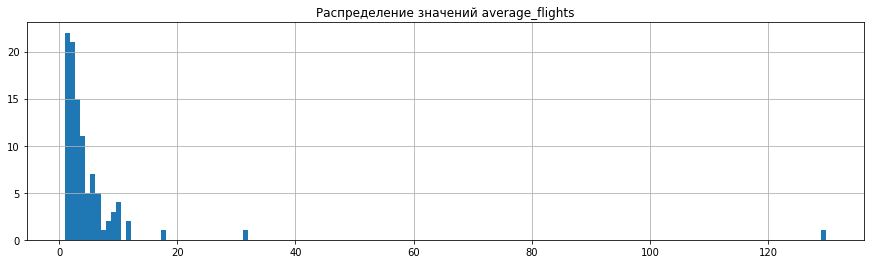

In [78]:
#Обзор значений average_flights на графике
df_city.hist('average_flights', bins=150, figsize=(15,4))
plt.title('Распределение значений average_flights')
plt.show()

Во второй таблице 101 наблюдение. Пропусков нет. Данные корректны. Одна переменная - объект, одна - число. Типы данных корректны. Среднее количество рейсов мы осознанно не переводим в целочисленный тип, для более корректного расположения городов на графиках. Округлим их до двух цифр после запятой для упрощения.

In [79]:
df_city['average_flights']=df_city['average_flights'].round(2)
df_city

,city,average_flights
0,Абакан,3.87
1,Анадырь,1.00
2,Анапа,2.16
3,Архангельск,5.35
4,Астрахань,2.45
...,...,...
96,Чита,1.58
97,Элиста,4.87
98,Южно-Сахалинск,4.29
99,Якутск,2.74


Сформируем выборку для 10 городов с наибольшим количеством рейсов.

In [80]:
#Топ 10 городов по кол-ву рейсов
top10_city=df_city.sort_values(by='average_flights', ascending=False).head(10)
top10_city

,city,average_flights
43,Москва,129.77
70,Санкт-Петербург,31.16
54,Новосибирск,17.32
33,Красноярск,11.58
20,Екатеринбург,11.32
67,Ростов-на-Дону,10.19
63,Пермь,10.13
10,Брянск,10.00
74,Сочи,9.61
84,Ульяновск,9.58


Построим графики.

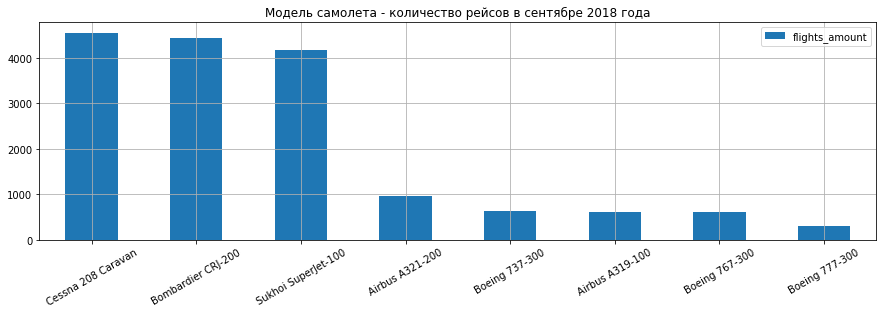

In [81]:
# График "модель самолета - количество рейсов"
df_plane=df_plane.sort_values(by='flights_amount', ascending=False)
df_plane.plot(y='flights_amount', x='model', figsize=(15,4), style='o-', grid=True, kind='bar', rot=30)
plt.title('Модель самолета - количество рейсов в сентябре 2018 года')
plt.xlabel('')
plt.ylabel('')
plt.show()

На графике видно, что среди самолетов есть три лидера - Cessna 208 Caravan, Bombardier CRJ-200, Sukhoi SuperJet-100. Для каждого из них более 4 тыс.рейсов за сентябрь 2018. Для остальных пяти моделей отметки менее 1 тыс.рейсов.

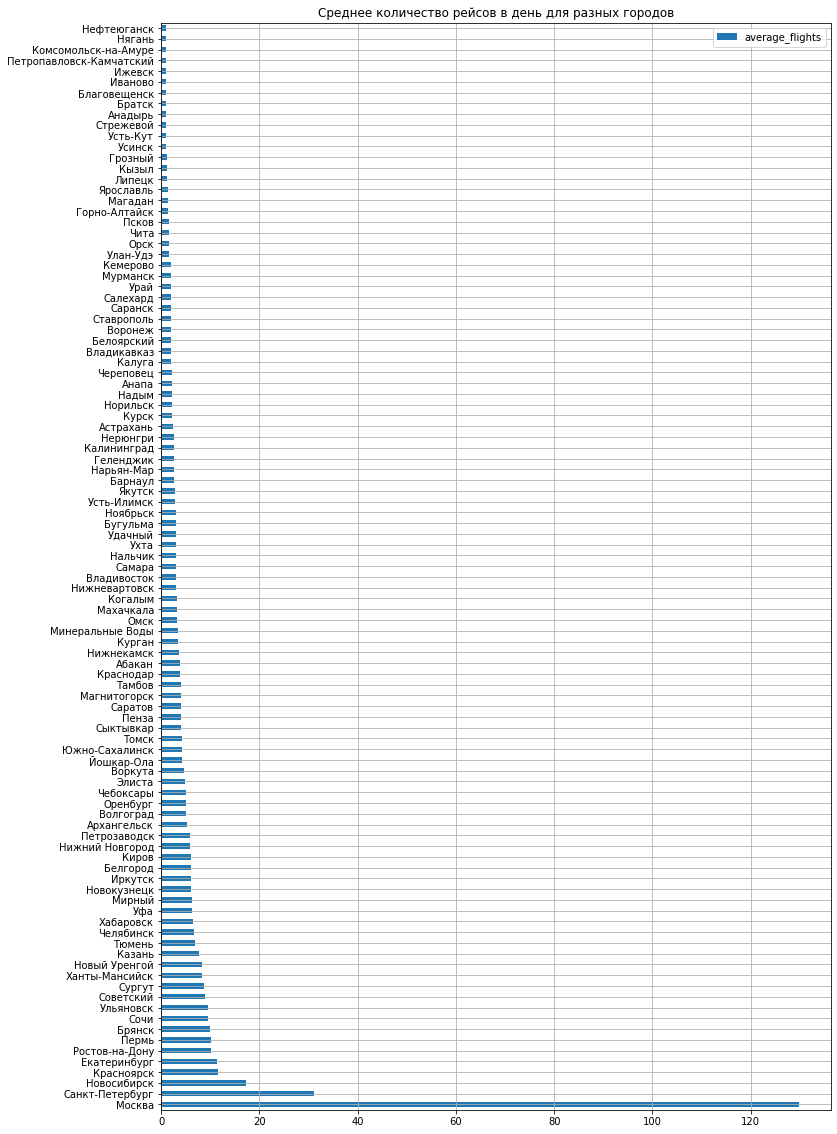

In [82]:
#График "город - количество рейсов"
df_city=df_city.sort_values(by='average_flights', ascending=False)
df_city.plot(y='average_flights', x='city', figsize=(12,20), style='o-', grid=True, kind='barh')
plt.title('Среднее количество рейсов в день для разных городов')
plt.xlabel('')
plt.ylabel('')
plt.show()

На графике видно, что Москва сильно выделяется на общем фоне (около 130 рейсов в день). В то время как  в большинстве городов наблюдается менее 10 рейсов в день.

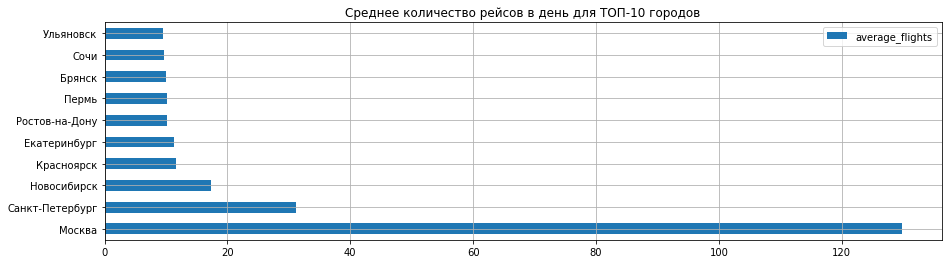

In [83]:
#График "топ 10 городов - количество рейсов"
top10_city.plot(y='average_flights', x='city', figsize=(15,4), style='o-', grid=True, kind='barh')
plt.title('Среднее количество рейсов в день для ТОП-10 городов')
plt.xlabel('')
plt.ylabel('')
plt.show()

Как уже было отмечено, Москва однозначный лидер - 130 рейсов в день. На втором месте Питер - около 31 рейса, Новосибирск - около 17 рейсов. Далее спад очень плавный от 12 рейсов в Красноярске до 10 рейсов в Ульяновске. 

Итак, среди городов есть три лидера Москва- столица, Питер - культурная столица и Новосибирск - неофициальная столица Сибири. Это три города - лидеры по численности населения в России. Количество рейсов в остальных семи городах почти не отличается.



## Проверка гипотезы средствами Python

/datasets/query_last.csv :
- week_number — номер недели;
- ticket_amount — количество проданных билетов за неделю;
- festival_week — есть ли на этой неделе фестиваль;
- festival_name — название фестиваля.

Проверить гипотезу: «Средний спрос на билеты во время фестивалей не отличается от среднего спроса на билеты в обычное время».



In [84]:
#Импорт файла с данными
df_fest=pd.read_csv('/datasets/query_last.csv')

In [85]:
#Обзор данных 3
df_fest

,week_number,ticket_amount,festival_week,festival_name
0,30,43568,30.0,Park Live
1,31,51034,31.0,Пикник Афиши
2,32,51675,NaN,NaN
3,33,51378,NaN,NaN
4,34,51492,NaN,NaN
5,35,51360,NaN,NaN
6,36,51386,36.0,Видфест
7,37,51670,NaN,NaN
8,38,51518,NaN,NaN
9,39,51623,NaN,NaN


In [86]:
df_fest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
week_number      10 non-null int64
ticket_amount    10 non-null int64
festival_week    3 non-null float64
festival_name    3 non-null object
dtypes: float64(1), int64(2), object(1)
memory usage: 448.0+ bytes


Итак, видим датасет из 10 наблюдений (десяти недель). Значения корректны. Пропуски указывают на то, что фестивали проводились в Москве только в трех из десяти наблюдений. Таким образом, сформируем две выборки: первая- недели, во время которых проводились фестивали, вторая - недели без фестивалей. 

In [87]:
#Выборка с фестивалями
fest_yes = df_fest.dropna()['ticket_amount']

In [88]:
fest_yes

0    43568
1    51034
6    51386
Name: ticket_amount, dtype: int64

In [89]:
#Описательная статистика fest_yes
fest_yes.describe()

count        3.000000
mean     48662.666667
std       4415.619700
min      43568.000000
25%      47301.000000
50%      51034.000000
75%      51210.000000
max      51386.000000
Name: ticket_amount, dtype: float64

3 наблюдения. Среднее значение равно 48 663. Стандартное отклонение 4 416.

In [90]:
#Выборка без фестивалей
fest_no = df_fest['ticket_amount'][df_fest['festival_week'].isnull()]

In [91]:
fest_no

2    51675
3    51378
4    51492
5    51360
7    51670
8    51518
9    51623
Name: ticket_amount, dtype: int64

In [92]:
#Описательная статистика fest_no
fest_no.describe()

count        7.000000
mean     51530.857143
std        130.933098
min      51360.000000
25%      51435.000000
50%      51518.000000
75%      51646.500000
max      51675.000000
Name: ticket_amount, dtype: float64

7 наблюдений. Среднее значение равно 51 531. Стандартное отклонение 131.

Стандартные отклонения у выборок отличаются, следовательно дисперсии не равны. 
(Установим "equal_var = False")

H0: Средний спрос на билеты во время фестивалей не отличается от среднего спроса на билеты в обычное время.
H1: Средний спрос на билеты во время фестивалей отличается от среднего спроса на билеты в обычное время

In [95]:
#Тест на проверку нулевой гипотезы
from scipy import stats as st
import numpy as np

alpha = .05

results = st.ttest_ind(
    fest_yes, 
    fest_no,
    equal_var = False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.377432493172683
Не получилось отвергнуть нулевую гипотезу


Для выбранного уровня значимости не отвергаем нулевую гипотезу. Вывод — нет оснований полагать, что Средний спрос на билеты во время фестивалей отличается от среднего спроса на билеты в обычное время.


## Выводы

Был написан парсер для сбора с сайта данных о 10 крупнейших фестивалях 2018 года.

Проведен исследовательский анализ данных, и сформированы датасеты для дальнейшего исследования.

Результаты были проверены на корректность и отсутствие ошибок. На основе полученных данных были выбраны 10 городов с наибольшим количеством рейсов. Построены графики зависимости количества рейсов в сентябре 2018 от модели самолета, количества рейсов в день от города (для всей выборки и для ТОП-10 городов). Графики наглядно показали, что среди самолетов есть три однозначных лидера (Cessna 208 Caravan, Bombardier CRJ-200, Sukhoi SuperJet-100). Среди городов на общем фоне сильно выделяется Москва - около 130 рейсов в день, Питер - 31, Новосибирск - 17, в остальных городах количество рейсов не превышает 12.

Была выдвинута гипотеза о том, что средний спрос на билеты во время фестивалей не отличается от среднего спроса на билеты в обычное время. Тесты показали, что нет оснований отвергнуть гипотезу. 
